# Exploratory Data Analysis (EDA)
Preliminary step in data analysis to:

- Summarize main characteristics of the data
- Gain better understanding of the data set
- Uncover relationships between variables
- Extract important variables

The main question we are trying to answer is:

<b>What are the characteristics that have the most impact on the car price?</b>

In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data
df = pd.read_csv(r'C:\Documents\Python Scripts\automobile_data.csv',index_col=0)
df.head()

,symboling,normalized-losses,make,fuel type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [3]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Descriptive Statistics
Descriptive statistics helps describe basic features of the data and obtains short summaries about the sample and measures of the data.

The <b>describe()</b> method summarizes basic statistics for numerical values in the dataframe

In [4]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


The <b>value_counts()</b> method summarizes categorical data

In [5]:
# Create a dataframe from the counts of the 'drive-wheels' column
drive_wheel_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheel_counts

,drive-wheels
fwd,118
rwd,75
4wd,8


We can see that there are:
- 118 front wheel drive cars
- 75 rear wheel drive cars
- 8 four wheel drive cars

In [6]:
# Rename the column to make it easier to read
drive_wheel_counts.rename(columns={'drive-wheels':'value-counts'}, inplace=True)
drive_wheel_counts

,value-counts
fwd,118
rwd,75
4wd,8


### Box Plots

Visualizes the varius distributions of numerical data

We will use a <b>box plot</b> to show the relationship between drive wheels and vehicle price.

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

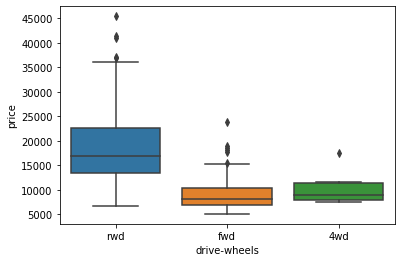

In [7]:
sns.boxplot(x='drive-wheels',y='price',data=df)

We can see that the distribution between <b>rwd</b> and the other two categories are distinct, while the distributions between <b>fwd</b> and <b>4wd</b> are almost indistinguishable.

### Scatter Plots
Show the relationship between two continuous variables
- <b>Predictor</b>: the variable used to predict the outcome (x-axis)
- <b>Target</b>: the varibale you are trying to predict (y-axis)


We will use a <b>scatter plot</b> to understand the relationship between engine size and vehicle price and explore whether engine size can possibly predict the price of a vehicle.

Text(0, 0.5, 'Price')

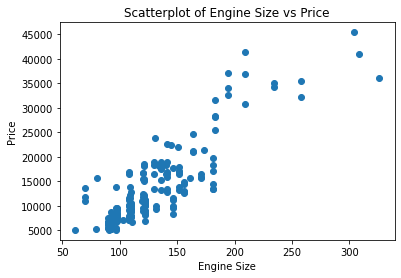

In [8]:
# Seaborn
#sns.scatterplot(x='engine-size',y='price',data=df)

#pyplot
x = df['engine-size']
y = df['price']
plt.scatter(x,y)

plt.title('Scatterplot of Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')

From the <b>scatter plot</b> we see that as the engine size increases so does the price of the vehicle! This indicates a positive linear relationship between the two variables.

## Grouping Data

Use pandas <b>dataframe.groupby()</b> method
- can be applied to categorical variables
- Groups data into subsets according to the different categories of that varibale
- single or multiple variables

For example, we will use this to find the average price of vehicles and observe how they differ between different types of body styles and drive wheels:

In [11]:
# Create variable containing all variables we want to compare
df_test = df[['drive-wheels','body-style','price']]

# Group the reduced data according to drive wheels and body style and get the average using .mean()
df_grp = df_test.groupby(['drive-wheels','body-style'],as_index=False).mean()

# Rename price column for clearer understanding of the data
df_grp.rename(columns={'price':'avg-price'},inplace=True)

df_grp

,drive-wheels,body-style,avg-price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Here we can see that rear wheel drive cars are priced higher on average with the top three being:
1. hardtop - $24202.71

2. convertible - $23949.60

3. sedan - $21711.83

The table is not the easiest to read nor visualize so we will transform it into a pivot table using the <b>pivot()</b> method

### Pivot() Method

- one variable is displayed along the columns and the other variable is displayed along the rows.

In [13]:
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')
df_pivot

avg-price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### Heatmaps
<b>Heatmaps</b> take a rectangular grid of data and assigns a color intensity based on the data value at the grid points. They are great for:
- plotting a target variable over multiple variables

We will use pyplot's <b>pcolor()</b> method to convert the pivot table into graphical form.

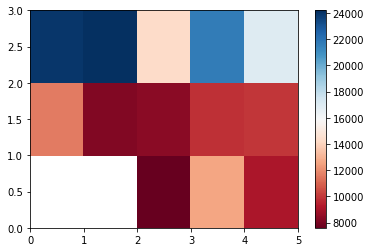

In [17]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()